In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import geopandas as gpd


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100


import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import rc


import plotly.express as px

from paths import *
from scripts import vis_simulaCovid

import yaml


## SimulaCovid API ('http://datasource.coronacidades.org:7000/')
- br/states/rt
- br/cities/embaixadores
- br/cities/cnes
- world/owid/heatmap
- br/cities/farolcovid/main
- br/cities/rt
- br/cities/simulacovid/main
- br/cities/cases/full
- br/states/farolcovid/main


### RT

In [2]:
#load br cities
geo_sp = gpd.read_file('../../brasil_geodata/maps/sp_municipios.json')
# cols = ['geocodigo','nome_mesorregiao','geometry']
cols = ['geocodigo','nome_mesorregiao','nome_municipio']
geo_sp = geo_sp[cols]

In [8]:
#load state data
url  = 'http://datasource.coronacidades.org/'
data = 'br/states/rt'

ds = pd.read_csv(f'{url}{data}')

ds['last_updated'] = pd.to_datetime(ds['last_updated'])

sp = ds[ds['state']=='SP']
sp = sp.rename(columns={'state':'city_id'})
sp['nome_mesorregiao'] = 'SP'
sp['nome_municipio']   = 'Estado de SP'

rj = ds[ds['state']=='RJ']
rj = rj.rename(columns={'state':'city_id'})
rj['nome_mesorregiao'] = 'RJ'
rj['nome_municipio']   = 'Estado do RJ'

mg = ds[ds['state']=='MG']
mg = mg.rename(columns={'state':'city_id'})
mg['nome_mesorregiao'] = 'MG'
mg['nome_municipio']   = 'Estado de MG'

am = ds[ds['state']=='AM']
am = am.rename(columns={'state':'city_id'})
am['nome_mesorregiao'] = 'AM'
am['nome_municipio']   = 'Estado de AM'

In [20]:
#load cities data
data = 'br/cities/rt'

df = pd.read_csv(f'{url}{data}')

df['last_updated'] = pd.to_datetime(df['last_updated'])


dd = df.merge(geo_sp, how='right', left_on = 'city_id', right_on = 'geocodigo')
dd.head()

regiao = 'Vale do Paraíba Paulista'
mask = (dd['nome_mesorregiao']==regiao)
vale = dd[mask]
vale = vale[vale['city_id'].notnull()]

mask = (dd['nome_municipio']=='São Paulo')
sp_city = dd[mask]


vale = pd.concat([vale,sp_city], 0)
vale = pd.concat([vale,sp], 0)
vale = pd.concat([vale,rj], 0)
vale = pd.concat([vale,mg], 0)
vale = pd.concat([vale,am], 0)



In [21]:
def plot_rt_final(df_final,col,N_COLS):
    
    N_ROWS = int(np.ceil(len(df_final[col].unique()) / N_COLS))

    # opening figura
    fig, axes = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(15, N_ROWS*3), dpi=400)

    for i, (city, result) in enumerate(df_final.groupby(col,sort=False)):
        ax = axes.flat[i]
        vis_simulaCovid.plot_rt(result, ax, city)
    fig.tight_layout()
    fig.set_facecolor('w')
    
    return fig

In [22]:
len(vale['nome_municipio'].unique())

36

In [23]:
vale.head()

city_id last_updated  Rt_most_likely  Rt_low_95  Rt_high_95  \
961  3.50251e+06   2020-04-18            3.00       0.67        7.84   
962  3.50251e+06   2020-04-19            2.69       0.68        6.03   
963  3.50251e+06   2020-04-20            2.49       0.69        5.30   
964  3.50251e+06   2020-04-21            2.35       0.64        4.81   
965  3.50251e+06   2020-04-22            2.24       0.67        4.52   

     data_last_refreshed  geocodigo          nome_mesorregiao nome_municipio  
961  2020-06-21 19:00:11  3502507.0  Vale do Paraíba Paulista      Aparecida  
962  2020-06-21 19:00:11  3502507.0  Vale do Paraíba Paulista      Aparecida  
963  2020-06-21 19:00:11  3502507.0  Vale do Paraíba Paulista      Aparecida  
964  2020-06-21 19:00:11  3502507.0  Vale do Paraíba Paulista      Aparecida  
965  2020-06-21 19:00:11  3502507.0  Vale do Paraíba Paulista      Aparecida

In [13]:
fig = plot_rt_final(ds,'state',3)
fig.savefig("/home/m/Downloads/Evolucao da Taxa de Transmissão Efetiva - Estados.pdf.pdf", bbox_inches='tight')

In [24]:
last_date = max(vale['last_updated']).strftime('%d-%m-%Y')

fig = plot_rt_final(vale,'nome_municipio',4)

fig.savefig(f"/home/m/Downloads/Evolucao da Taxa de Transmissão Efetiva - Vale do Paraíba e Litoral Norte.pdf", bbox_inches='tight')

## Selected cities

In [25]:
## Rt for most recent date
max_date = max(vale['last_updated'])
vale_last_date = vale.drop_duplicates('nome_municipio', keep='last').sort_values(by='Rt_most_likely')
last_date = max_date.strftime('%Y-%m-%d')
fig = vis_simulaCovid.plot_rt_bars(vale_last_date, title= f'Taxa Transmissão Efetiva em {last_date}', place_type='nome_municipio')

In [26]:
fig = fig.update_xaxes(tickangle=30)
fig.write_image(f"/home/m/Downloads/Taxa Transmissão Efetiva em {last_date}.pdf", width=1080, height=720)

In [27]:
fig

In [28]:
vale_last_date['nome_municipio']

228                Estado de AM
21681                 São Paulo
2033               Estado de SP
21864             São Sebastião
6024                   Cruzeiro
1477               Estado do RJ
23493                   Taubaté
9104                    Igaratá
4883              Caraguatatuba
847                Estado de MG
4505           Campos do Jordão
3777                   Caçapava
12685                    Lorena
9241                   Ilhabela
15813                 Paraibuna
19094                   Roseira
21366       São José dos Campos
24022                   Ubatuba
11590                  Jambeiro
23720                  Tremembé
14743       Natividade da Serra
12307                 Lavrinhas
16692           Pindamonhangaba
6142                      Cunha
2058                    Bananal
19581              Santa Branca
11352                   Jacareí
8248              Guaratinguetá
16825                   Piquete
3859         Cachoeira Paulista
1024                  Aparecida
17785   

In [29]:
municipios = ['São Paulo', 'Estado de SP', 'Taubaté', 'São José dos Campos', 'Jambeiro','Roseira','Ubatuba']
vale_filtered = vale[vale['nome_municipio'].isin(municipios)]



themes = yaml.load(open('../themes/themes_simulaCovid.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['rt_selected_cities']
fig = vis_simulaCovid.plot_rt_plotly(vale_filtered, themes)

fig

## RT MAP

In [ ]:
#load br cities
sp = gpd.read_file('../../brasil_geodata/maps/sp_municipios.json')
cols = ['geocodigo','nome_mesorregiao','geometry']
sp = sp[cols]

In [ ]:
#load data
url  = 'http://datasource.coronacidades.org:7000/'
data = 'br/cities/farolcovid/main'

df = pd.read_csv(f'{url}{data}')

dd = df.merge(sp, how='right', left_on = 'city_id', right_on = 'geocodigo')
dd = gpd.GeoDataFrame(dd)


regiao = 'Vale do Paraíba Paulista'
mask = dd['nome_mesorregiao']==regiao
vale = dd[mask]

vale = gpd.GeoDataFrame(vale)

In [116]:
def plot_map(dd,var):
    fig = plt.figure(figsize=(25,25))
    ax  = fig.add_subplot(1,1,1)
    ax.set_title(f'{var}', fontsize=23)


    missings={
        "color": "white",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    }


    # dd.plot(column=var,ax=ax, legend=True,cmap='Oranges', edgecolor = "#ffffff",  scheme='user_defined', classification_kwds={'bins':[0.75,1]},missing_kwds=missings )
#     dd.plot(column=var,ax=ax, legend=True,cmap='Oranges', edgecolor = "#ffffff",  scheme='user_defined', classification_kwds={'bins':[10,100,500,1000,10000]},missing_kwds=missings )
#     dd.plot(column=var,ax=ax, legend=True,cmap='Oranges', edgecolor = "#ffffff",  scheme='user_defined', classification_kwds={'bins':[1,5,10,50,100,500,1000,3000]},missing_kwds=missings )
    dd.plot(column=var,ax=ax, legend=True,cmap='Oranges', edgecolor = "#ffffff",  scheme='user_defined', classification_kwds={'bins':[10,30,50,70]},missing_kwds=missings )

#     dd.plot(column=var ,ax=ax, legend=True,cmap='Oranges', edgecolor = "#ffffff" ,missing_kwds=missings, scheme='quantiles',k=30)

    ax.axis('off')


    plt.rc('legend',fontsize='large')

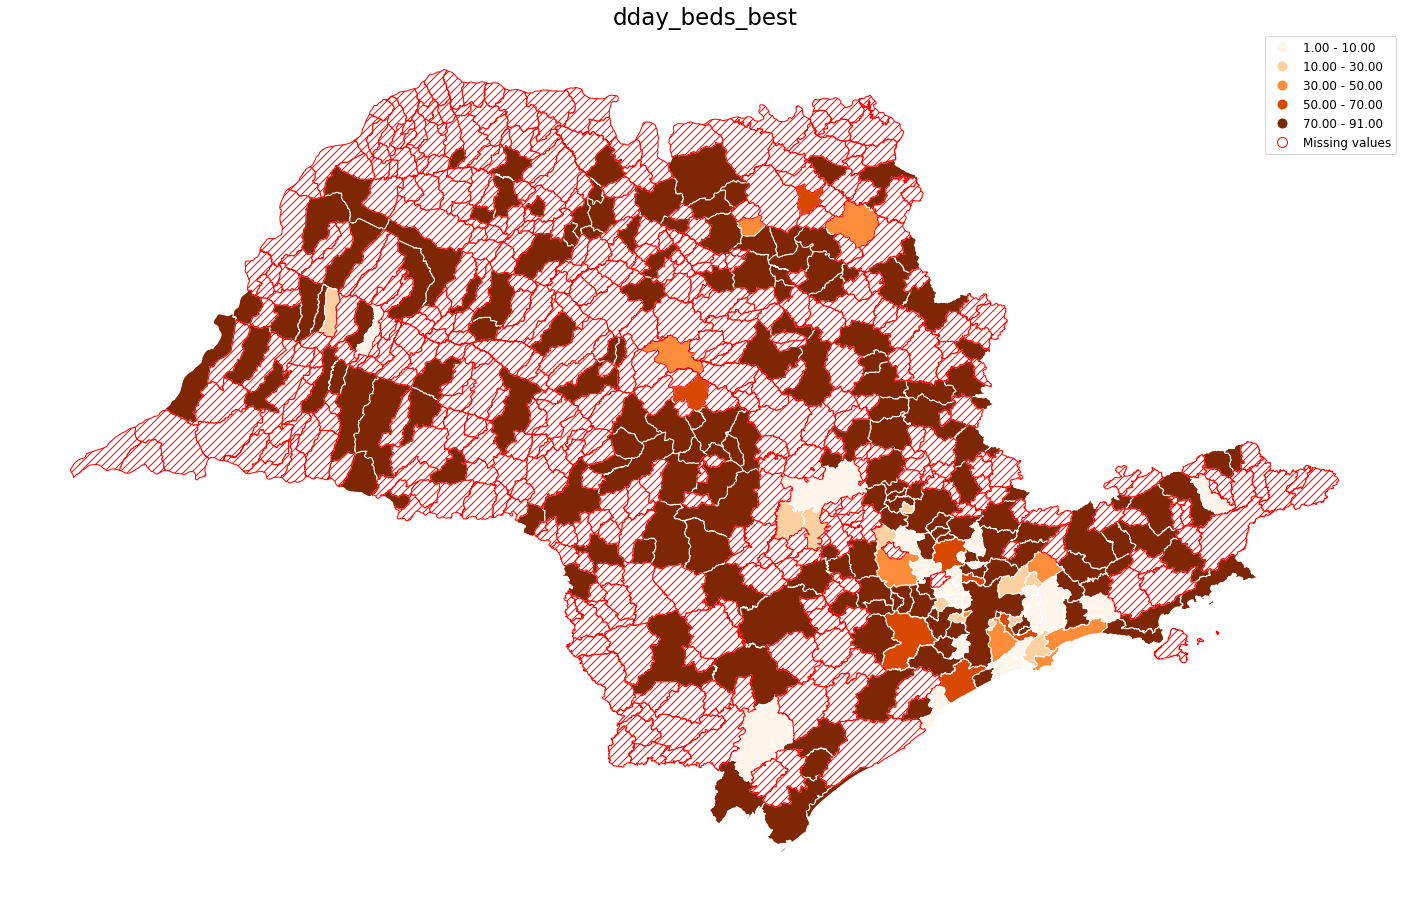

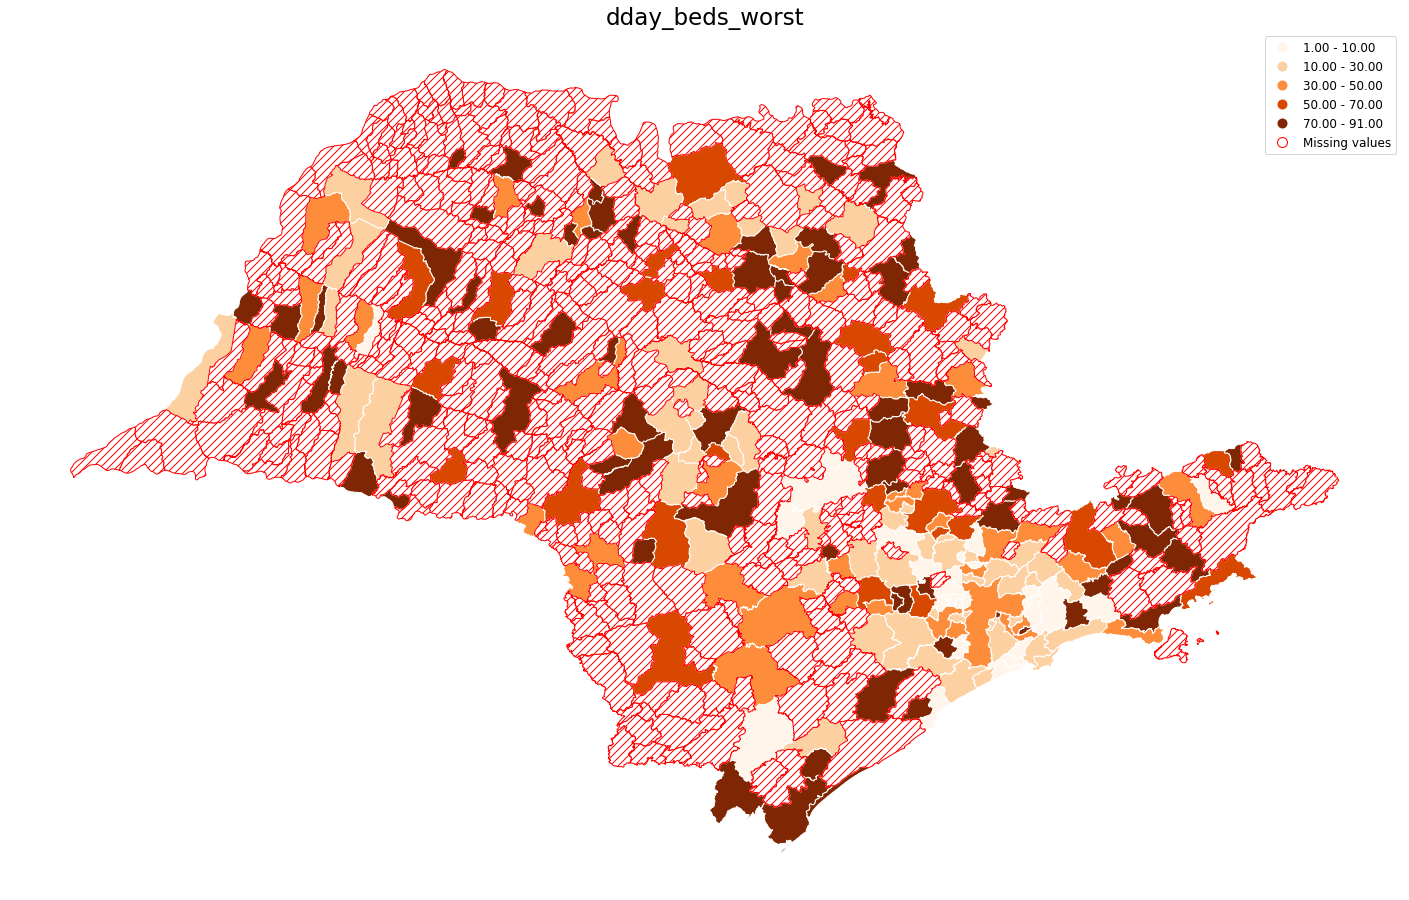

In [117]:
var = 'dday_beds_best'

plot_map(dd,var)


var = 'dday_beds_worst'

plot_map(dd,var)



# var = 'rt_10days_ago_avg'

# plot_map(dd,var)

# var = 'rt_ratio_week_avg'

# plot_map(dd,var)